<a href="https://colab.research.google.com/github/bcasazharuddin/Automata-_Theory/blob/main/finalA_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ******Final Assignment 4****** 

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.AnimatePDA import *
from jove.Def_PDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 5112, done.
remote: Counting objects: 100% (478/478), done.
remote: Compressing objects: 100% (339/339), done.
remote: Total 5112 (delta 272), reused 317 (delta 124), pack-reused 4634
Receiving objects: 100% (5112/5112), 7.64 MiB | 20.54 MiB/s, done.
Resolving deltas: 100% (3277/3277), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

 "help(AnimatePDA)" gives you info on how to use animations with PDA 



## * Write the CFG below in the Jove comments
## * Then write the PDA code based on the CFG
## * Then test and run the PDA!

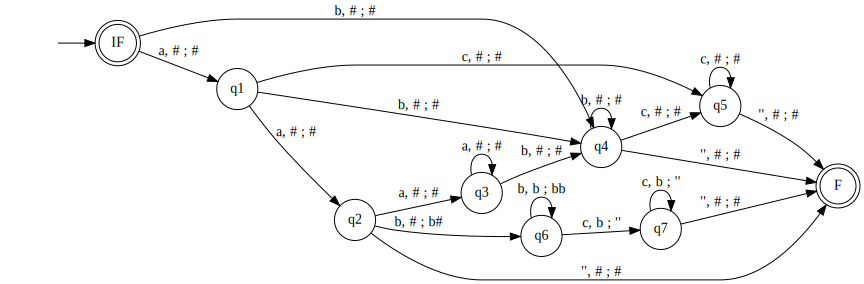

In [97]:
# Lif = { a^i b^j c^k : if i=2 then j=k}

Lif = md2mc('''
PDA

IF : a,# ; # -> q1
IF : b,# ; # -> q4
q1 : a,# ; # -> q2
q1 : b,# ; # -> q4
q1: c,# ; # -> q5
q2 : a,# ; # -> q3
q2 : '',# ; # -> F
q2 : b,# ; b# -> q6
q3 : a,# ; # -> q3
q3 : b,# ; # -> q4
q4 : b,# ; # -> q4
q4 : c,# ; # -> q5
q4 : '',# ; # -> F
q5 : c,#; # -> q5
q5 : '',#; # -> F
q6 : b,b; bb -> q6
q6 : c,b; '' -> q7
q7 : c,b; ''->q7
q7 : '',#; #-> F
''')
Dpda = dotObj_pda(Lif, FuseEdges=True)
Dpda

## Your PDA must correctly handle all these tests.

 aa bbb ccc   (accept)
 
 aa bbbb cccc (accept)
 
 aa         (accept)
 
 a bbb cccc (accept)
 
 aaa bb c   (accept)
 
 Epsilon    (accept, as there are zero a's)

 a bb cc    (accept, as there is no constraint to not match b's and c's if two a's)

 c b        (reject)

 aa bb cc a (reject)

 a bb a     (reject)

 ccac       (reject)

 
 baac       (reject)

 ac         (accept)



## Here are the tests to run, with the outcomes shown above!

In [98]:
explore_pda('aabbbccc', Lif) # (accept)

String aabbbccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aabbbccc', '#')
->  ('q1', 'abbbccc', '#')
->  ('q2', 'bbbccc', '#')
->  ('q6', 'bbccc', 'b#')
->  ('q6', 'bccc', 'bb#')
->  ('q6', 'ccc', 'bbb#')
->  ('q7', 'cc', 'bb#')
->  ('q7', 'c', 'b#')
->  ('q7', '', '#')
->  ('F', '', '#') .


In [99]:
explore_pda('aabbbbcccc', Lif) # (accept)

String aabbbbcccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aabbbbcccc', '#')
->  ('q1', 'abbbbcccc', '#')
->  ('q2', 'bbbbcccc', '#')
->  ('q6', 'bbbcccc', 'b#')
->  ('q6', 'bbcccc', 'bb#')
->  ('q6', 'bcccc', 'bbb#')
->  ('q6', 'cccc', 'bbbb#')
->  ('q7', 'ccc', 'bbb#')
->  ('q7', 'cc', 'bb#')
->  ('q7', 'c', 'b#')
->  ('q7', '', '#')
->  ('F', '', '#') .


In [100]:
explore_pda('aa', Lif) # (accept)

String aa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aa', '#')
->  ('q1', 'a', '#')
->  ('q2', '', '#')
->  ('F', '', '#') .


In [101]:
explore_pda('abbbcccc', Lif) # (accept)

String abbbcccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'abbbcccc', '#')
->  ('q1', 'bbbcccc', '#')
->  ('q4', 'bbcccc', '#')
->  ('q4', 'bcccc', '#')
->  ('q4', 'cccc', '#')
->  ('q5', 'ccc', '#')
->  ('q5', 'cc', '#')
->  ('q5', 'c', '#')
->  ('q5', '', '#')
->  ('F', '', '#') .


In [102]:
explore_pda('aaabbc', Lif) # (accept)

String aaabbc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaabbc', '#')
->  ('q1', 'aabbc', '#')
->  ('q2', 'abbc', '#')
->  ('q3', 'bbc', '#')
->  ('q4', 'bc', '#')
->  ('q4', 'c', '#')
->  ('q5', '', '#')
->  ('F', '', '#') .


In [103]:
explore_pda('aaabbc', Lif) # (accept)

String aaabbc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aaabbc', '#')
->  ('q1', 'aabbc', '#')
->  ('q2', 'abbc', '#')
->  ('q3', 'bbc', '#')
->  ('q4', 'bc', '#')
->  ('q4', 'c', '#')
->  ('q5', '', '#')
->  ('F', '', '#') .


In [104]:
explore_pda('', Lif) # (accept)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .


In [105]:
explore_pda('abbcc', Lif) # (* fixed to be accept *)

String abbcc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'abbcc', '#')
->  ('q1', 'bbcc', '#')
->  ('q4', 'bcc', '#')
->  ('q4', 'cc', '#')
->  ('q5', 'c', '#')
->  ('q5', '', '#')
->  ('F', '', '#') .


In [106]:
explore_pda('cb', Lif) # (reject)

String cb rejected by your PDA :-(
Visited states are:
{('IF', 'cb', '#')}


In [107]:
explore_pda('aabbcca', Lif) # (reject)

String aabbcca rejected by your PDA :-(
Visited states are:
{('q6', 'cca', 'bb#'), ('q1', 'abbcca', '#'), ('IF', 'aabbcca', '#'), ('F', 'a', '#'), ('q7', 'ca', 'b#'), ('q7', 'a', '#'), ('q6', 'bcca', 'b#'), ('F', 'bbcca', '#'), ('q2', 'bbcca', '#')}


In [108]:
explore_pda('abba', Lif) # (reject)

String abba rejected by your PDA :-(
Visited states are:
{('q1', 'bba', '#'), ('IF', 'abba', '#'), ('F', 'a', '#'), ('q4', 'a', '#'), ('F', 'ba', '#'), ('q4', 'ba', '#')}


In [109]:
explore_pda('ccac', Lif) # (reject)

String ccac rejected by your PDA :-(
Visited states are:
{('IF', 'ccac', '#')}


In [110]:
 explore_pda('baac', Lif) # (reject)

String baac rejected by your PDA :-(
Visited states are:
{('IF', 'baac', '#'), ('q4', 'aac', '#'), ('F', 'aac', '#')}


In [111]:
explore_pda('ac', Lif) # (accept)

String ac accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'ac', '#')
->  ('q1', 'c', '#')
->  ('q5', '', '#')
->  ('F', '', '#') .
